Task 16

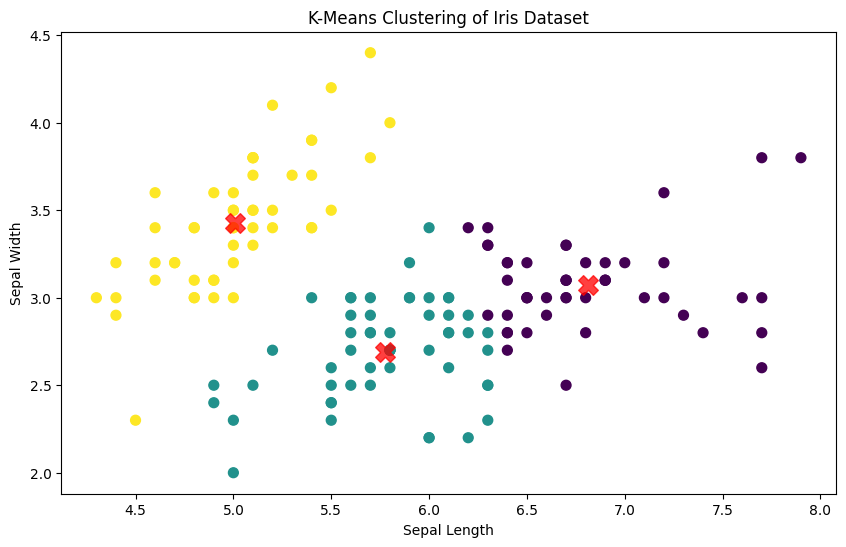

Accuracy: 0.82
Confusion Matrix:
[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]


In [2]:
# Implementing K-Means Clustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

# Loading the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# Evaluating the clustering
from scipy.stats import mode

labels = np.zeros_like(y_kmeans)
for i in range(3):
    mask = (y_kmeans == i)
    labels[mask] = mode(y[mask])[0]

print(f"Accuracy: {accuracy_score(y, labels)}")
print("Confusion Matrix:")
print(confusion_matrix(y, labels))


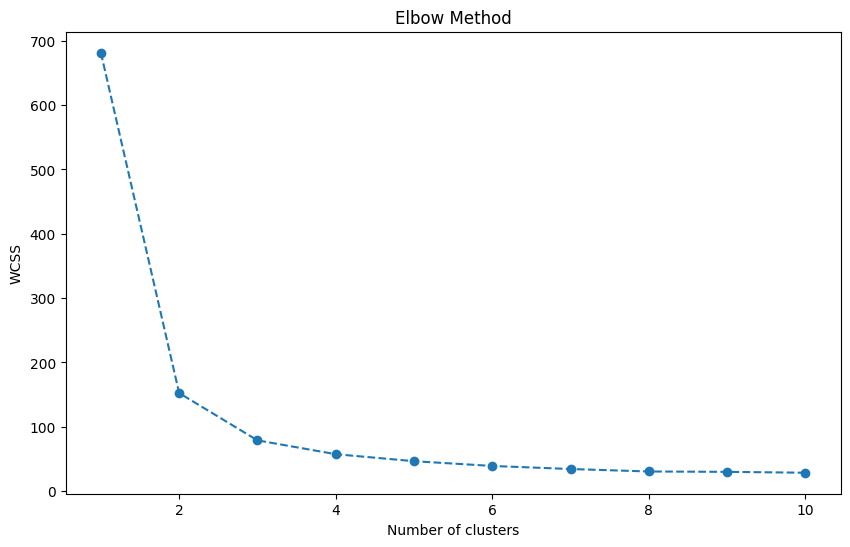

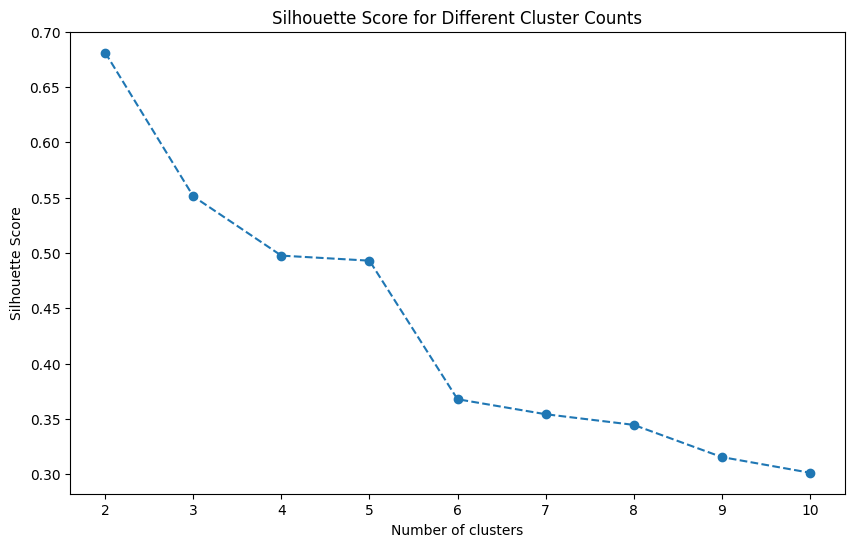

In [3]:
#Choosing the Optimal Number of Cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Different Cluster Counts')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


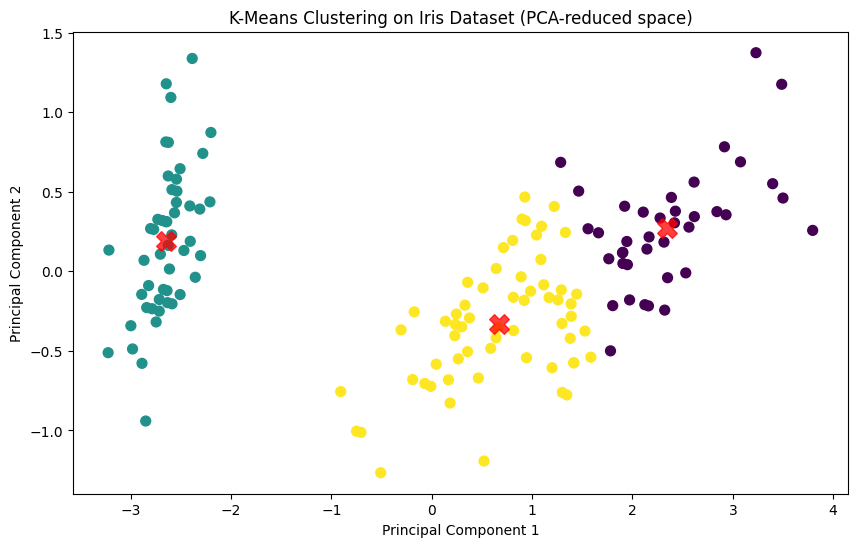

In [4]:
# Cluster Visualization with PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

iris = load_iris()
X = iris.data
y = iris.target

# Applying PCA to reduce the dataset to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Applying K-Means clustering to the original dataset
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('K-Means Clustering on Iris Dataset (PCA-reduced space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


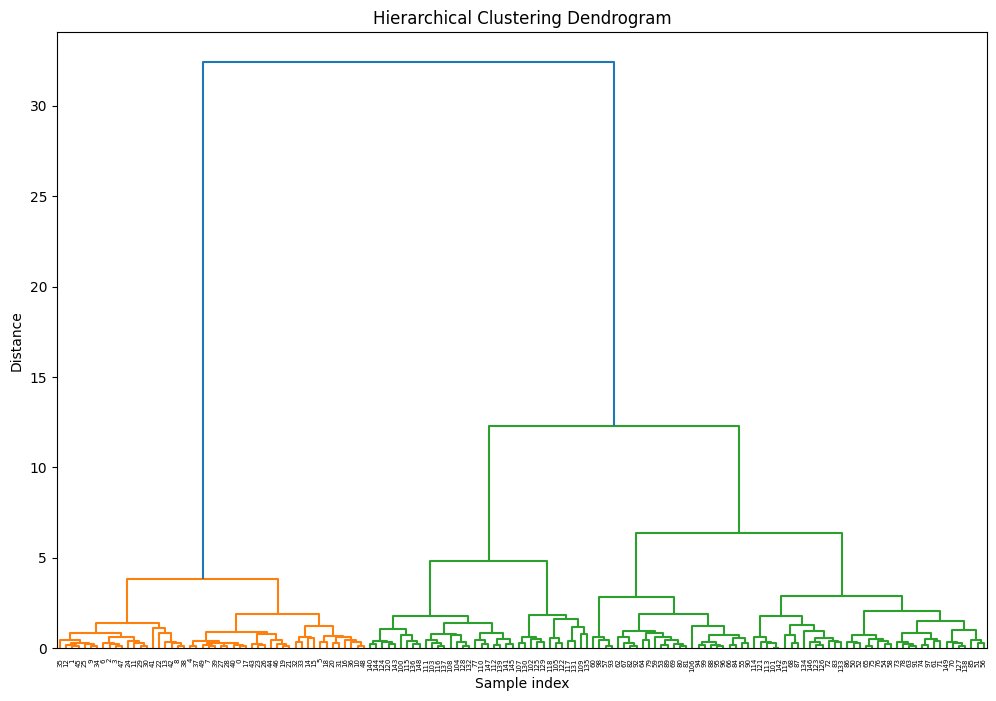

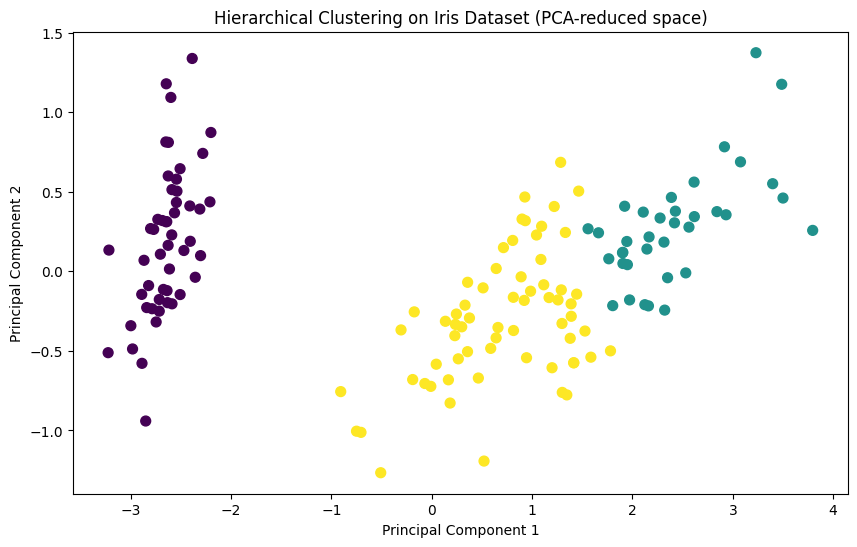

In [5]:
 #  Hierarchical Clustering: Dendrogram
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

iris = load_iris()
X = iris.data

# Hierarchical clustering
linked = linkage(X, method='ward')

# Plotting a dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, 
           orientation='top', 
           distance_sort='ascending', 
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Choosing appropriate number of clusters
# Cutting the dendrogram at a point that gives us 3 clusters
num_clusters = 3
clusters = fcluster(linked, num_clusters, criterion='maxclust')

# Visualizing the clusters in 2D space using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Hierarchical Clustering on Iris Dataset (PCA-reduced space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


K-Means Silhouette Score: 0.551191604619592
Hierarchical Clustering Silhouette Score: 0.5543236611296419
K-Means ARI: 0.7163421126838476
Hierarchical Clustering ARI: 0.7311985567707746


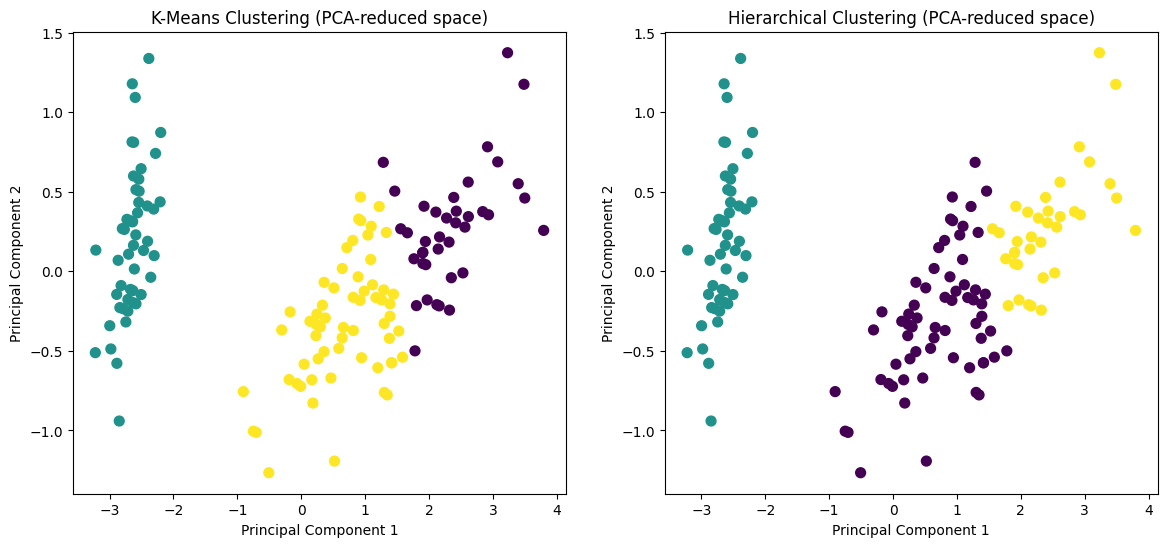

In [6]:
#Comparing Clustering Algorithm
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data
y = iris.target

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_agg = agg_clustering.fit_predict(X)

# Evaluating and comparing the clustering results
# Silhouette Score
silhouette_kmeans = silhouette_score(X, y_kmeans)
silhouette_agg = silhouette_score(X, y_agg)

# Adjusted Rand Index (ARI)
ari_kmeans = adjusted_rand_score(y, y_kmeans)
ari_agg = adjusted_rand_score(y, y_agg)

# Evaluation metrics
print(f"K-Means Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical Clustering Silhouette Score: {silhouette_agg}")
print(f"K-Means ARI: {ari_kmeans}")
print(f"Hierarchical Clustering ARI: {ari_agg}")

# Visualizing the clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.title('K-Means Clustering (PCA-reduced space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_agg, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (PCA-reduced space)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()
